<div style="text-align: center">
<img src="https://raw.githubusercontent.com/xyizko/xo-mathz/refs/heads/main/gfx/x.jpeg">    
<img src="https://raw.githubusercontent.com/xyizko/xo-tagz/refs/heads/main/gfx/i.png">
</div>
<div style="background: black; color: #00ff00; padding: 2px; text-align: center;background-size: cover; padding: 10px; text-shadow: 00 0 20px #ec4899">
    <h1> Pandas Tutorial 2.1 </h1>
    
</div>

In [2]:
# Python BeautyPanty 

import logging
from rich import print as rprint  # For rprinting
from rich.pretty import pprint  # For pretty printing
from rich import inspect  # For inspect

from rich.console import Console  # For console.print
from rich.markdown import Markdown  # For markdow
from rich.panel import Panel  # For Panel()
from rich import box  # For Panel Boxes
from rich.prompt import Prompt  # For Prompting
from rich.style import Style  # For styles colors
from rich.text import Text  # For text Styles
from rich.logging import RichHandler
from rich.traceback import install
from rich.rule import Rule # Horizontal Line
import numpy as np
import random

console = Console()  # Standard code to access console
install(show_locals=True)

# Setting up rich logger with color
logging.basicConfig(
    level=logging.DEBUG,
    format="%(message)s",
    datefmt="[%X]",
    handlers=[RichHandler(rich_tracebacks=True, markup=True)],
)
log = logging.getLogger("rich")

# Horizontal Line 
def dividerz(title: str = "", color: str = ""):
    console.print(Rule(f"{title}", style=f"{color}"))

# boxa
def boxa(txt: str = "", title: str = "", subtitle: str = "", brd: str = ""):
    console.print(Panel.fit(f"{txt}",
                            title=f"{title}",
                            subtitle=f"{subtitle}", 
                            style="Italic", 
                            border_style=f"{brd}"))

# Pandas Specific 
import pandas as pd # Dataframe
import numpy as np # Numerical Operations
from scipy import stats # Stats from scipy
import seaborn as sns # Seasborn Plots

# Matplotlib and setting dark mode
import matplotlib.pyplot as plt
# Setting Dark Mode
plt.style.use('dark_background')


# TOC
1. [What?](#What?)
2. [PLots](#Plotting)


[🔙](#TOC)

# What 

1. Contination of pandas usage and more cocepts


## Airlines DS

In [3]:
# Importing airlines data set as a1

URL = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
a1 = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")
a1

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
# Make new Df dropping index 

a1c = a1.copy()

In [6]:
# Drop column index 
a1c = a1c.drop(columns = 'index')

In [7]:
a1c

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


[🔙](#TOC)

# Plotting

In [ ]:
# testing plots
a1c.plot()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


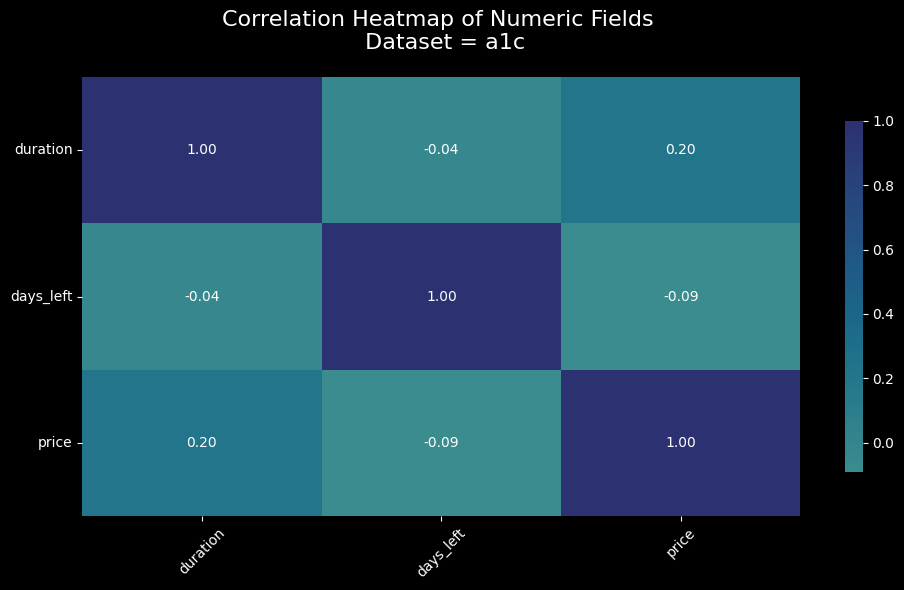

In [11]:
# Make Pearons correlation of all numeric fields 

def pear1():

    # Seleect only numeric types 
    numeric_df = a1c.select_dtypes(include='number') 

    # Make a correlation  matrix 
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 6))

    # Generate a mask for the upper triangle (optional, for cleaner look)
    sns.heatmap(
        corr_matrix,
        annot=True,           # Show correlation values in cells
        cmap='crest',      # Color scheme: red = positive, blue = negative
        center=0,             # Center color at zero
        square=False,         # Cells don't need to be square
        fmt='.2f',            # Format numbers to 2 decimal places
        cbar_kws={"shrink": 0.8}  # Shrink color bar
    )
    
    plt.title("Correlation Heatmap of Numeric Fields \n Dataset = a1c", fontsize=16, pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

pear1()

<Axes: >

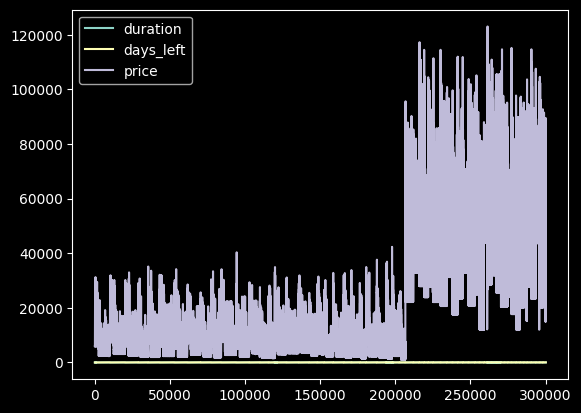

In [12]:
# Default plots - 

a1c.plot()

<Axes: title={'center': 'Flight Price vs Duration'}, xlabel='duration', ylabel='price'>

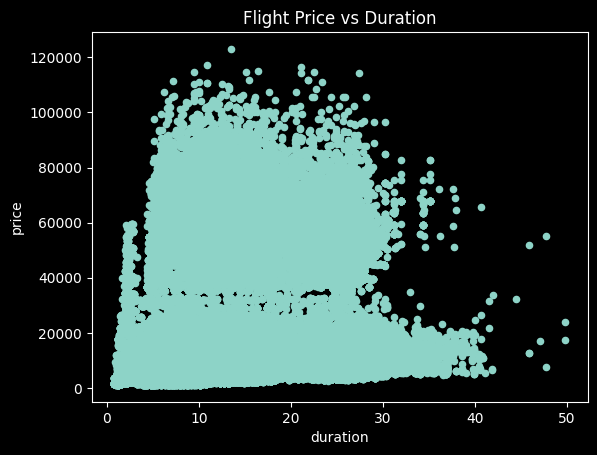

In [14]:
# Price vs Duration (if duration is numeric)
a1c.plot(x='duration', y='price', kind='scatter', title='Flight Price vs Duration')

<Axes: title={'center': 'Distribution of Flight Prices'}, ylabel='Frequency'>

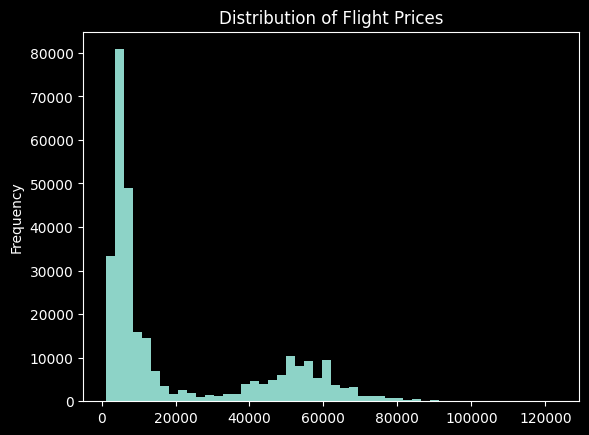

In [15]:
# Price distribution histogram
a1c['price'].plot(kind='hist', bins=50, title='Distribution of Flight Prices')

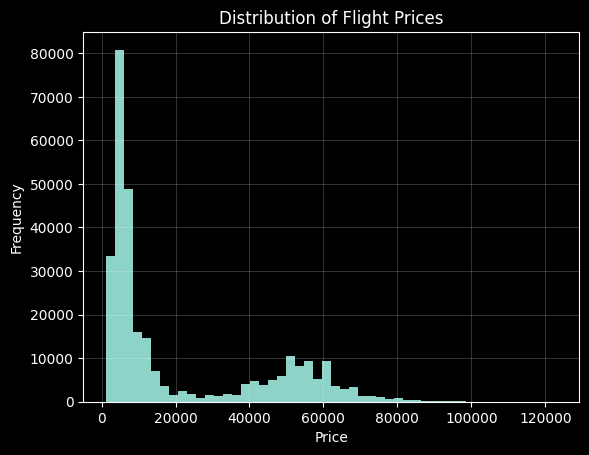

In [18]:
# Histogram with more control 

def hist1():
    a1c['price'].plot(kind='hist', bins=50, title='Distribution of Flight Prices')
    plt.grid(True, which='both',  linewidth=0.7, alpha=0.2)  # Optional: customize grid
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
    
hist1()

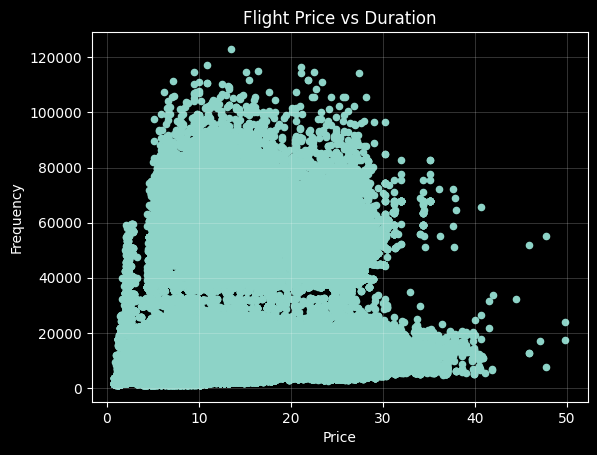

In [20]:
# Scatter plot with more control as above 

def sca1():
    a1c.plot(x='duration', y='price', kind='scatter', title='Flight Price vs Duration')
    plt.grid(True, which='both',  linewidth=0.7, alpha=0.2)  # Optional: customize grid
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

sca1()

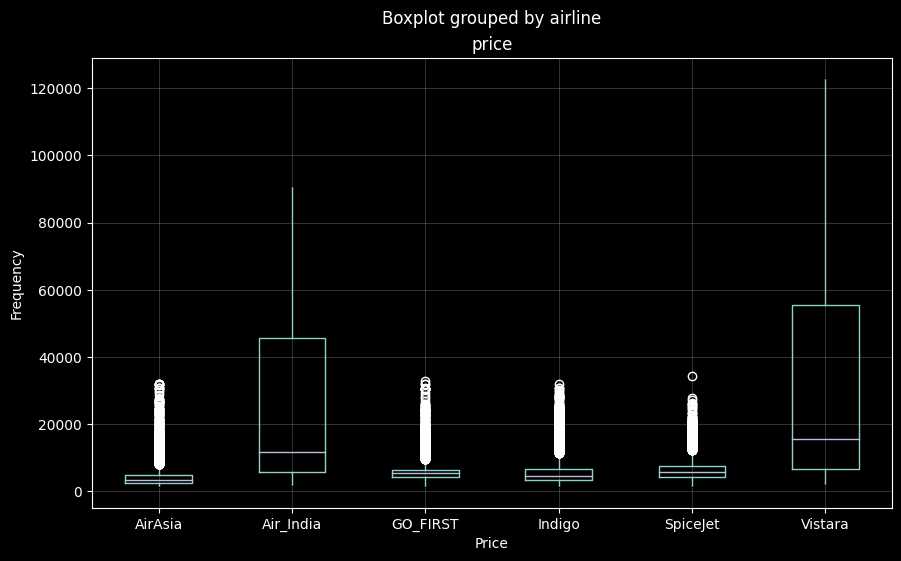

In [22]:
# Box Plot
def box1():
    a1c.boxplot(column='price', by='airline', figsize=(10, 6))
    plt.grid(True, which='both',  linewidth=0.7, alpha=0.2)  # Optional: customize grid
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

box1()

In [24]:
a1c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


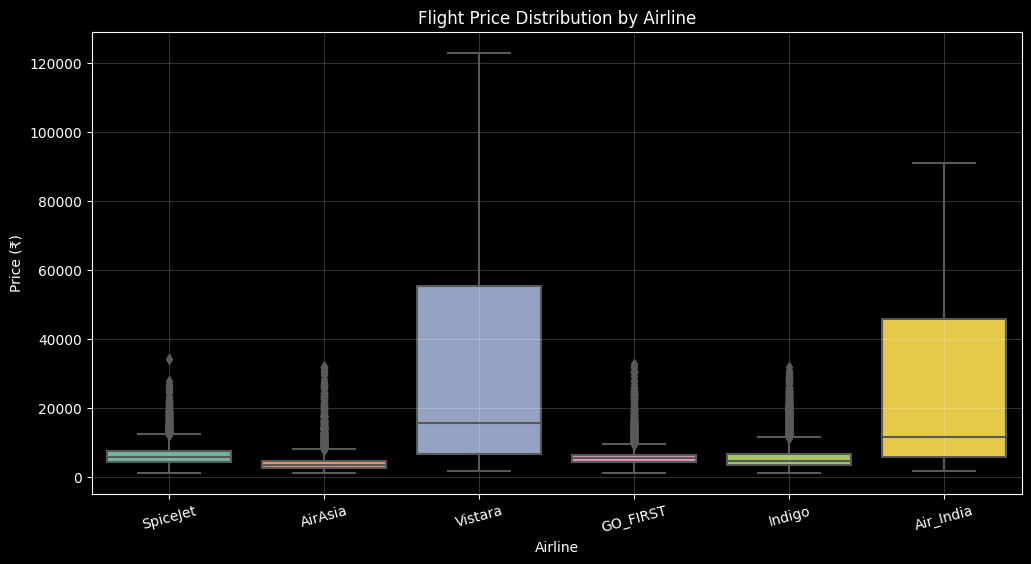

In [27]:
# Compare Price Distribution by airline

def cpda1():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=a1c, x='airline', y='price', palette='Set2')
    plt.title('Flight Price Distribution by Airline')
    plt.xticks(rotation=15)
    plt.ylabel('Price (₹)')
    plt.xlabel('Airline')
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

cpda1()

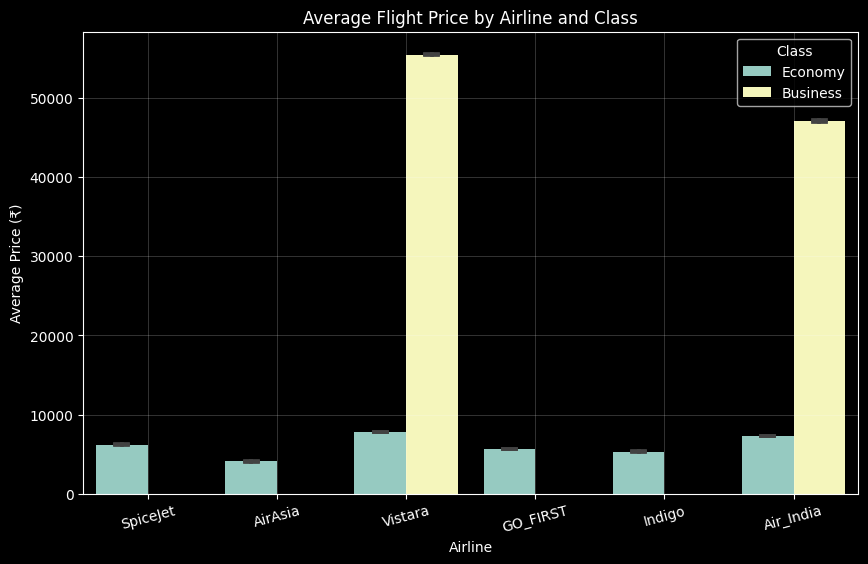

In [30]:
# Average flight price by airline and class

def afpac1():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=a1c, x='airline', y='price', hue='class', capsize=0.1)
    plt.title('Average Flight Price by Airline and Class')
    plt.ylabel('Average Price (₹)')
    plt.xlabel('Airline')
    plt.legend(title='Class')
    plt.xticks(rotation=15)
    plt.grid(which='both', linewidth=0.7, alpha=0.2)
    plt.show()

afpac1()